# Анализ Контрагентов

    Провожу разведовательный анализ данных.
    Цели:
        * первичный анализ данных
        * найти нерелевантные признаки
        * найти кореляцию признаков с ключевым

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Код ниже решает вопрос с ошибкой
# Не удалось найти отрисовщика для типа MIME "application/vnd.plotly.v1+json", но он может быть доступен в Marketplace.
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [152]:
# Загрузка части данных (первый файл)
df = pd.read_csv('data/agents2020.csv',index_col='Наименование ДП')
df

,Факт. 1,Факт. 2,Факт. 3,Факт. 4,Факт. 5,Факт. 6,Факт. 7,Факт. 8,Факт. 9,Факт. 10,...,"2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB"
Наименование ДП,,,,,,,,,,,,,,,,,,,,,
0,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,3.438313e+10,2.673481e+10,3.179697e+09,6.167667e+09,7.461828e+08,3.603784e+09,3.280355e+09,6.200120e+09,8.716191e+08,3.658634e+09
1,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,4.169796e+08,5.349955e+08,1.212357e+07,6.944586e+06,4.480064e+07,8.747516e+07,1.630064e+07,1.109172e+07,5.135732e+07,9.411019e+07
2,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,2.316724e+09,2.460679e+09,5.026662e+08,3.644229e+08,8.552994e+07,-6.456439e+08,4.148586e+08,1.611318e+08,-9.298981e+07,-1.207210e+08
3,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,1.171315e+10,1.272604e+10,4.100857e+09,4.481281e+09,6.840634e+09,3.999298e+09,4.903117e+09,5.186553e+09,7.869977e+09,4.029232e+09
4,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,2.652547e+10,3.055828e+10,7.163980e+10,3.799862e+10,4.593606e+10,4.960408e+10,2.338912e+10,3.727984e+10,5.307524e+10,5.622122e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,1.047255e+08,2.884618e+08,7.961783e+05,7.751592e+05,6.176433e+06,1.580637e+07,1.174522e+06,8.923567e+05,6.782166e+06,2.074204e+07
527,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,1.008364e+09,9.064178e+08,1.490363e+08,1.553159e+08,8.043376e+07,6.917389e+07,1.426694e+08,1.465019e+08,6.499554e+07,7.620446e+07
528,Х,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


## Визуальная оценка
### Поиск пропусков

In [153]:
# слишком много признаков, для данного вывода
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 0 to 530
Columns: 130 entries, Факт. 1 to 2019, Прибыль (убыток) от продажи, RUB
dtypes: float64(67), int64(3), object(60)
memory usage: 543.4+ KB


In [154]:
# % содержания пропусков в данных
df.isna().mean().sort_values(ascending=False)

Итого                                         0.011299
Факт. 1                                       0.000000
2016, Оборотные активы, RUB                   0.000000
2017, Заёмные средства (долгосрочные), RUB    0.000000
2016, Заёмные средства (долгосрочные), RUB    0.000000
                                                ...   
Факт. 39                                      0.000000
Факт. 38                                      0.000000
Факт. 37                                      0.000000
Факт. 36                                      0.000000
2019, Прибыль (убыток) от продажи, RUB        0.000000
Length: 130, dtype: float64

In [155]:
# Поиск скрытых пропусков
unicue_values = {}
for column in df.loc[:,'Факт. 1':'Факт. 60'].columns:
   for key, value in df.loc[:][column].value_counts().items():
        #print(key,value)
        if key in unicue_values:
            unicue_values[key] = unicue_values[key] + value
        else:
            unicue_values[key] = value
print(f'В столбцах Факт пристутствуют следующие данные:\n{unicue_values}')

В столбцах Факт пристутствуют следующие данные:
{'Х': 30368, '100': 40, 'Н/Д': 569, '30': 125, '20': 23, '50': 10, '10': 725}


In [156]:
df2 = mask = df.loc[:,'Факт. 1':'Факт. 60']
(df2 == 'Н/Д').mean().sort_values(ascending=False)



Факт. 33    0.483992
Факт. 54    0.467043
Факт. 51    0.024482
Факт. 57    0.016949
Факт. 58    0.011299
Факт. 27    0.011299
Факт. 31    0.007533
Факт. 32    0.005650
Факт. 39    0.001883
Факт. 28    0.001883
Факт. 35    0.001883
Факт. 37    0.001883
Факт. 38    0.001883
Факт. 41    0.001883
Факт. 40    0.001883
Факт. 25    0.001883
Факт. 42    0.001883
Факт. 44    0.001883
Факт. 48    0.001883
Факт. 50    0.001883
Факт. 56    0.001883
Факт. 26    0.001883
Факт. 1     0.001883
Факт. 10    0.001883
Факт. 23    0.001883
Факт. 20    0.001883
Факт. 12    0.001883
Факт. 5     0.001883
Факт. 6     0.001883
Факт. 9     0.001883
Факт. 16    0.001883
Факт. 8     0.000000
Факт. 46    0.000000
Факт. 47    0.000000
Факт. 49    0.000000
Факт. 24    0.000000
Факт. 7     0.000000
Факт. 45    0.000000
Факт. 53    0.000000
Факт. 55    0.000000
Факт. 4     0.000000
Факт. 3     0.000000
Факт. 59    0.000000
Факт. 52    0.000000
Факт. 11    0.000000
Факт. 43    0.000000
Факт. 13    0.000000
Факт. 14    0

Наблюдаем в столбцах "Факт. 33" и "Факт. 54" больше 30% пропусков, на такие признаки нельзя опираться и их надо исключить из анализа.

## !!!! Необходимо так же проверить на скрытые пропуски и остальные признаки

In [157]:
# Удаляю неинформативные признаки
df.drop(['Факт. 33', 'Факт. 54'], axis=1, inplace=True)

## Визуализация
### Колеляция признаков с искомым

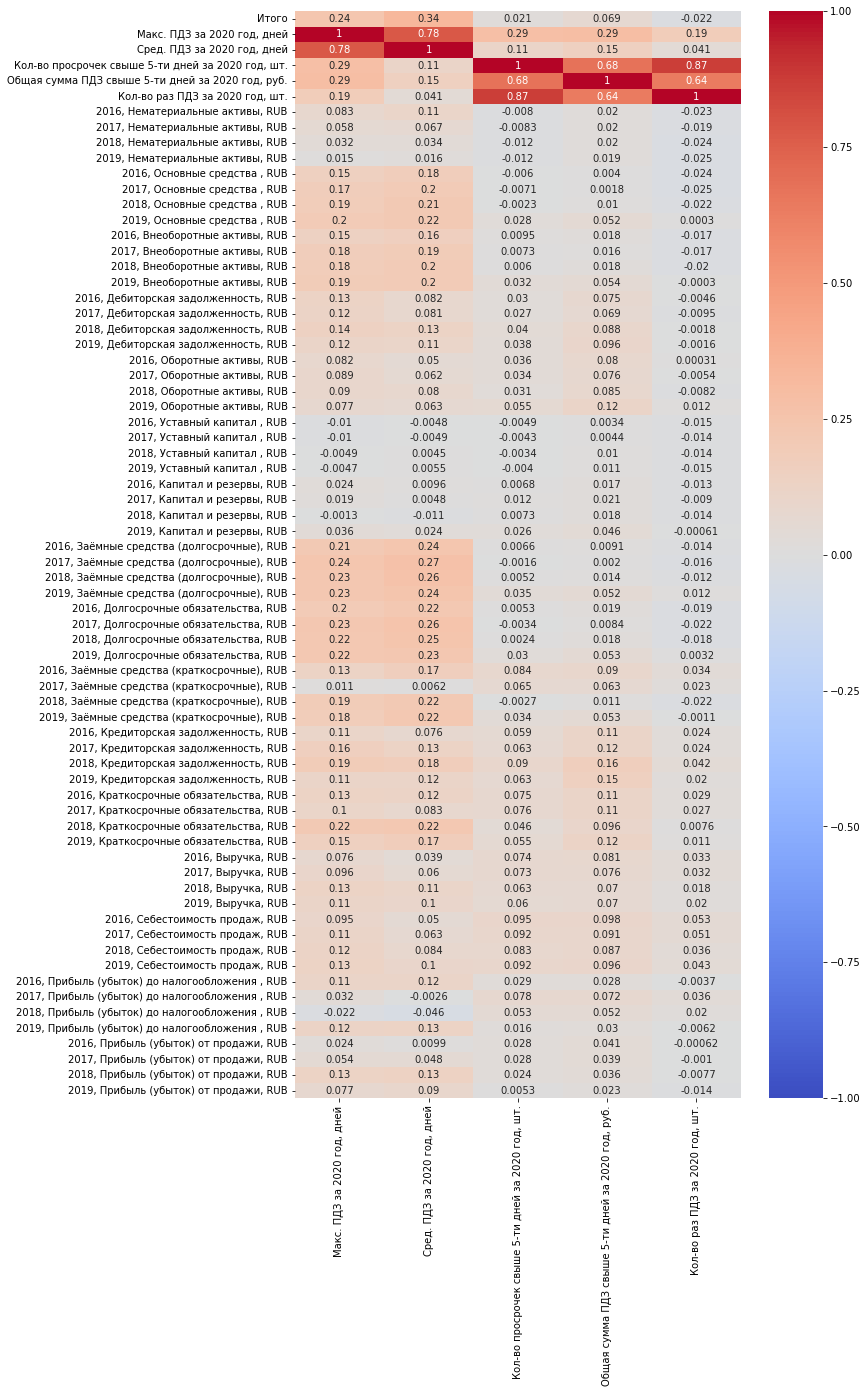

In [158]:
"""
Целевой признак:
Макс.ПДЗ за 2020 год

Список признаков связанных с просрочкой:
"Макс. ПДЗ за 2020 год, дней",
"Сред. ПДЗ за 2020 год, дней",
"Кол-во просрочек свыше 5-ти дней за 2020 год, шт.",
"Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.",
"Кол-во раз ПДЗ за 2020 год, шт."
"""
# Кореляция всех признаков
df_corr = df.corr()
# Тепловая карта корреляции признаков
fig = plt.figure(figsize=(10,20))
heat = sns.heatmap(df_corr[['Макс. ПДЗ за 2020 год, дней',
                            'Сред. ПДЗ за 2020 год, дней',
                            'Кол-во просрочек свыше 5-ти дней за 2020 год, шт.',
                            'Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.',
                            'Кол-во раз ПДЗ за 2020 год, шт.']], 
            vmin=-1,
            vmax=1,
            annot=True,
            cmap='coolwarm');

    На графике налюдается сильная взаимная корреляция признаков связанных с просрочкой, 
    а так же слабая корреляции целевого признака с призаками не связанными с просрочкой

Отдельно моно посмотреть на кореляцию с целевым признаком

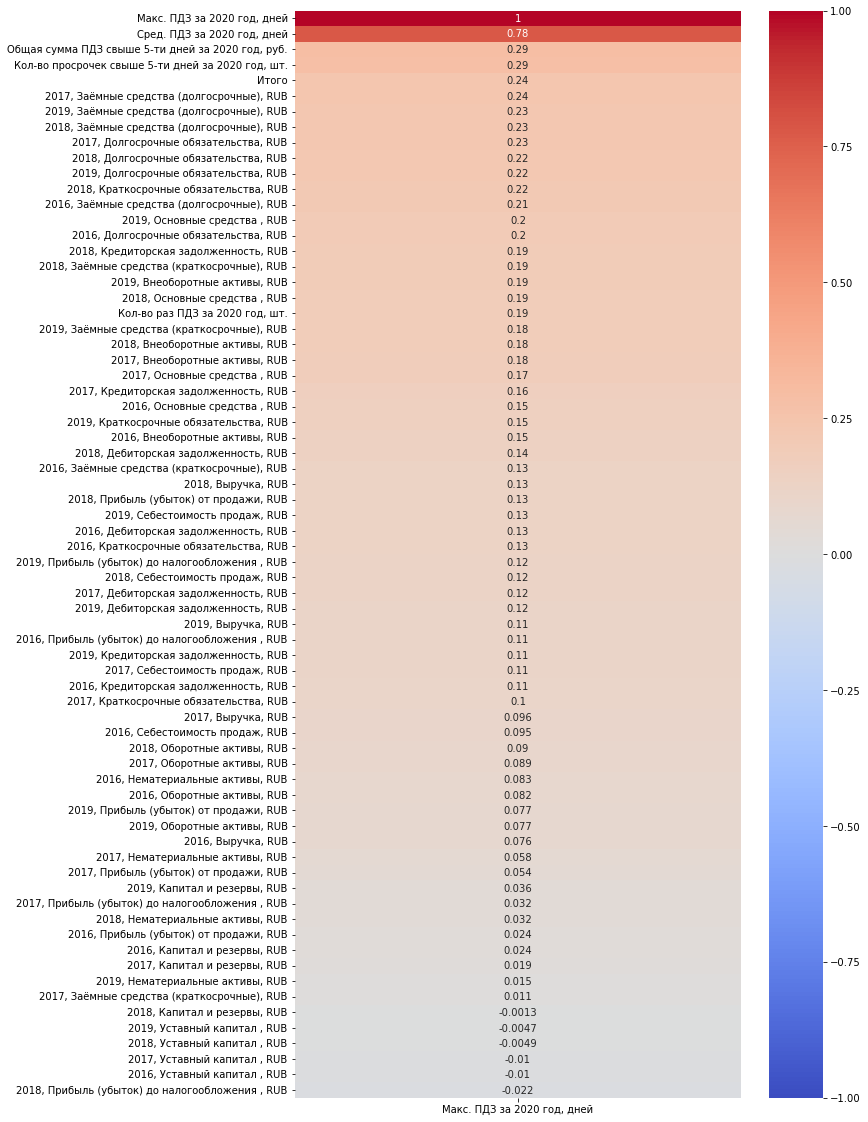

In [159]:
# Кореляция всех признаков
df_corr = df.corr()
# Тепловая карта корреляции признаков
df2 = df_corr[['Макс. ПДЗ за 2020 год, дней']].sort_values(by='Макс. ПДЗ за 2020 год, дней', ascending=False)
fig = plt.figure(figsize=(10,20))
heat = sns.heatmap(df2, 
            vmin=-1,
            vmax=1,
            annot=True,
            cmap='coolwarm');

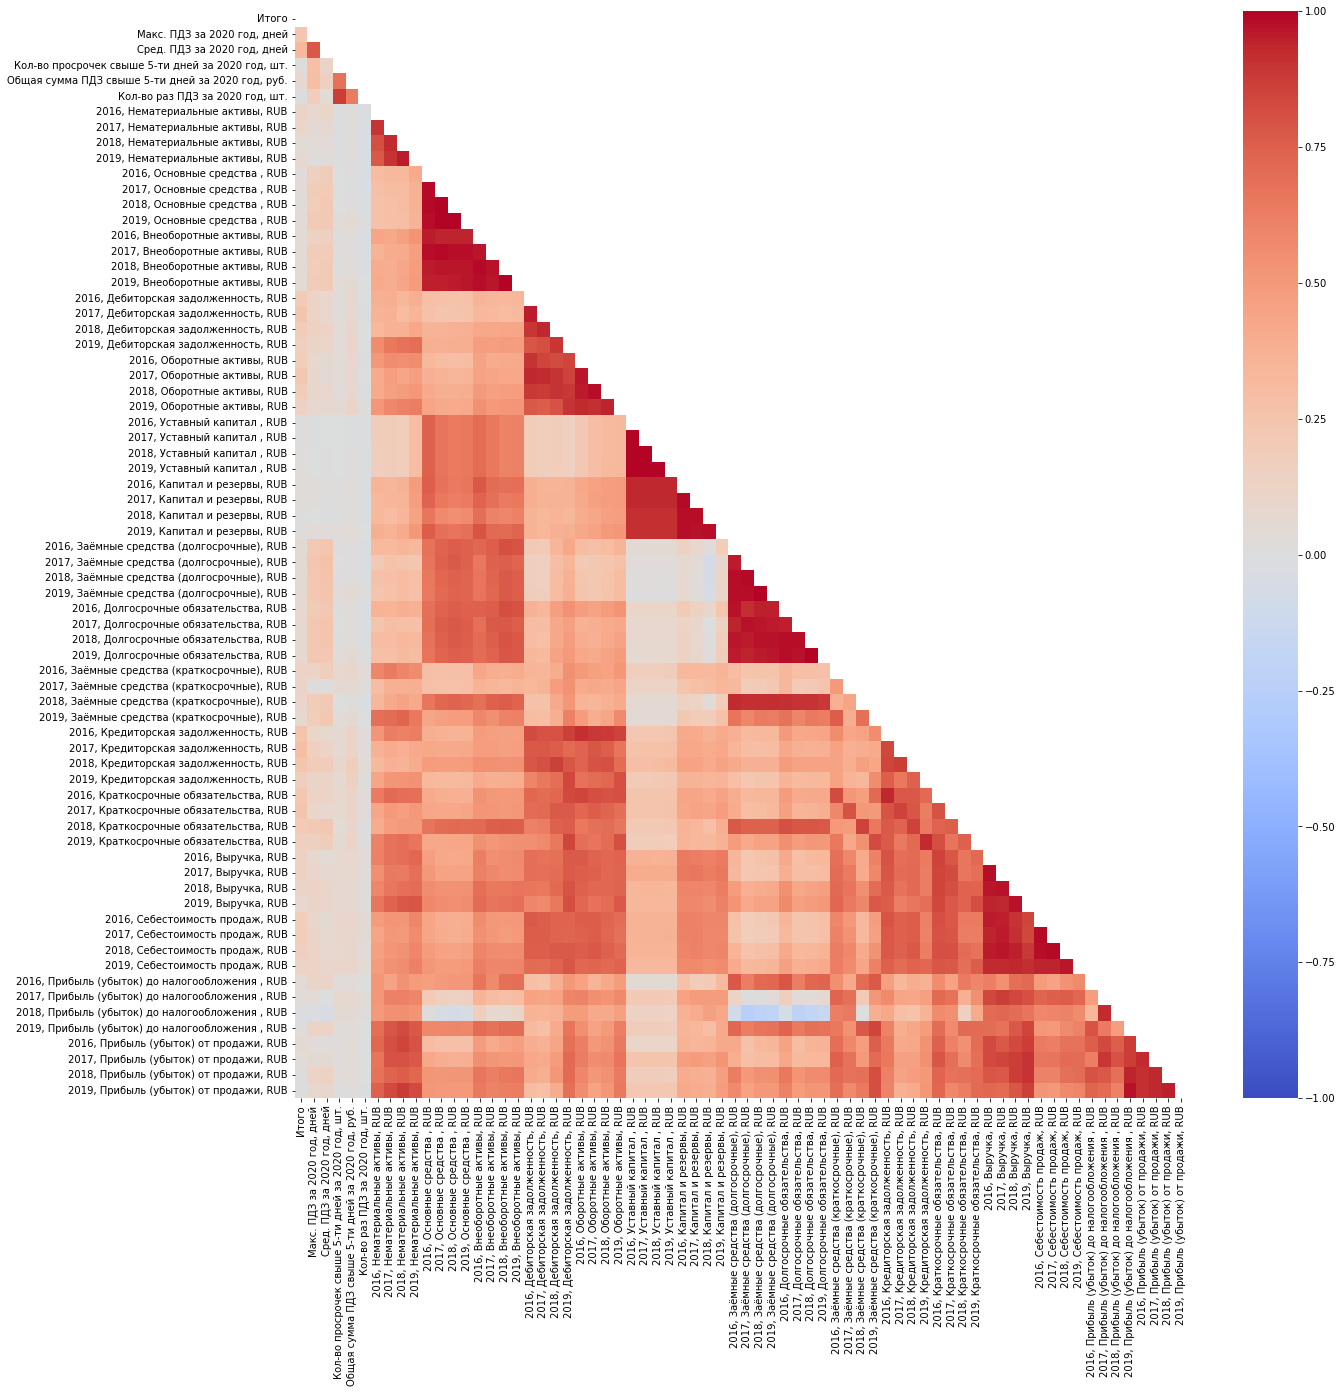

In [160]:
# Кореляция всех признаков
df_corr = df.corr()
# Оставляю данные ниже главной диаганали (маска)
upp_mat = np.triu(df_corr)
# Тепловая карта корреляции признаков
fig = plt.figure(figsize=(20,20))
sns.heatmap(df_corr, 
            vmin=-1,
            vmax=1,
            annot=False,
            cmap='coolwarm',
            mask=upp_mat);

    На графике видно сильную взаимную корреляцию многих признаков, но сюда не входят признаки связанные с просрочкой.

In [161]:
# Пробую найти корреляцию, уменьшив число значений в признаках связанных с просрочкой
ser1 =df['Макс. ПДЗ за 2020 год, дней'].value_counts()
fig = px.bar(ser1,
             log_y=True,
             title='Распределение признака "Макс. ПДЗ за 2020 год, дней"')
fig.show()


In [162]:
# Создам новый прзнак, заменяя все значения больше 0 на True, 0 на False
df['Факт просрочки'] = df['Макс. ПДЗ за 2020 год, дней'].apply(lambda x: True if x>0 else False)

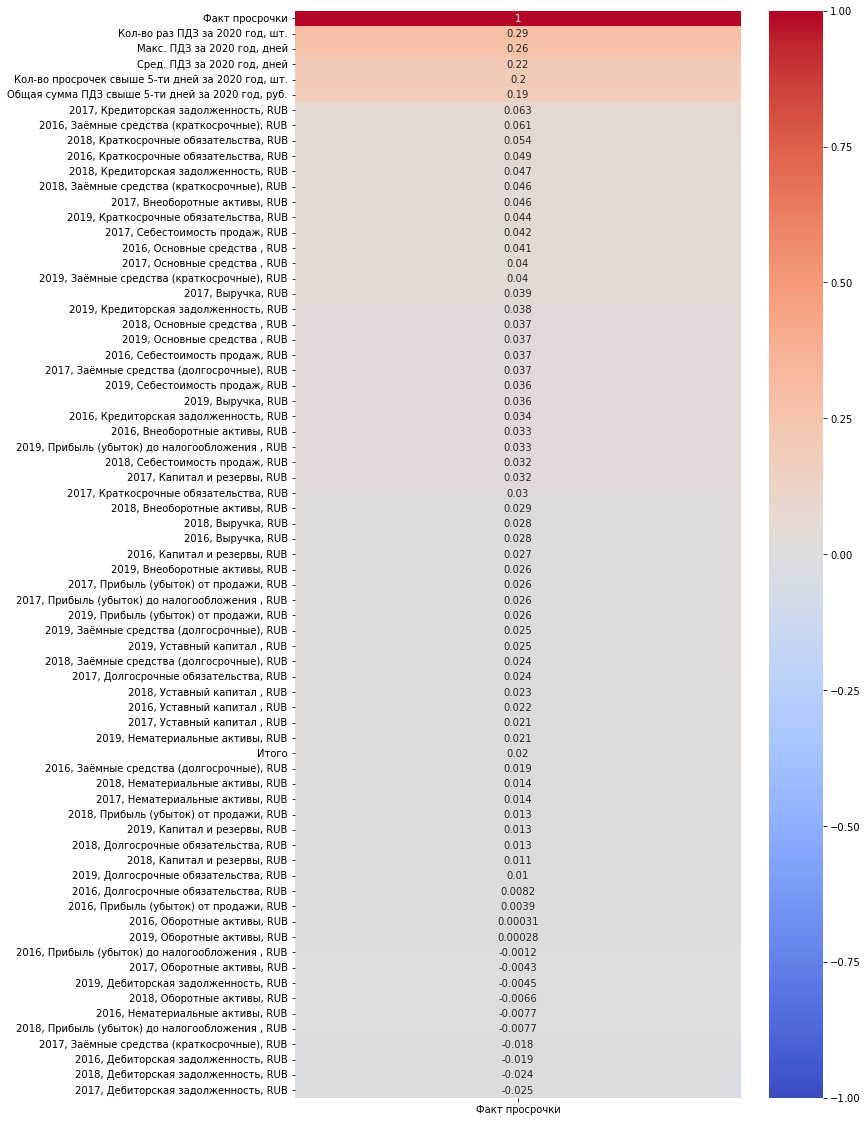

In [163]:
# Проверяю кореляцию нового признака с остальными
# Кореляция всех признаков
df_corr = df.corr()
# Тепловая карта корреляции признаков
df2 = df_corr[['Факт просрочки']].sort_values(by='Факт просрочки', ascending=False)
fig = plt.figure(figsize=(10,20))
heat = sns.heatmap(df2, 
            vmin=-1,
            vmax=1,
            annot=True,
            cmap='coolwarm');
#df_corr[['Факт просрочки']]

In [164]:
print(f' Кореляция целевого признака в количественном виде: {df_corr[["Макс. ПДЗ за 2020 год, дней"]].abs().sum()[0] - 1}\n \
Кореляция целевого признака в логическом виде: {df_corr[["Факт просрочки"]].abs().sum()[0] - 1}')


 Кореляция целевого признака в количественном виде: 9.519572625924981
 Кореляция целевого признака в логическом виде: 2.876107730459354


 ### Общий вывод.
 * #### Визуальными методами не удалось выявить сильной взаимосвязьи целевого признака с другими признаками в данных, однако присутсвует слабая коредяция с целой группой признаков
 * #### Необходимо искать взаимосвязи более чем с двумя признаками, лучше методами ML
 * #### Кореляция целевого признака в логическом виде сильно ниже


### Пробую визуализировать на плоскости распределения признаков, давших кореляцию большк 20% с целевым

In [185]:
# Отбираю необходимые признаки
mask = df_corr["Макс. ПДЗ за 2020 год, дней"].abs() > 0.2
top_columns = mask[mask].index
print(f'Отобрано {top_columns.shape[0]} признаков')

Отобрано 15 признаков


In [186]:
figs = []
for column in top_columns:
    figs.append(px.scatter(df,
                           x='Макс. ПДЗ за 2020 год, дней',
                           y=column))
for fig in figs:
    fig.show()